In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection
from sklearn.preprocessing import LabelEncoder
from sklearn import linear_model
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from numpy import set_printoptions
from numpy import sqrt
from numpy import asarray
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.models import load_model

In [3]:
apple=pd.read_csv('res/Apple15-23.csv',engine='python',sep=',')
apple['Date'] = pd.to_datetime(apple.Date,format='%Y/%m/%d %H:%M:%S')

In [4]:
apple.sample(5)

,Date,Open,High,Low,Close,Adj Close,Volume
1713,2021-10-21,148.809998,149.639999,147.869995,149.479996,148.174622,61421000
1244,2019-12-11,67.202499,67.775002,67.125000,67.692497,66.215729,78756800
1523,2021-01-21,133.800003,139.669998,133.589996,136.869995,135.040283,120150900
902,2018-08-02,50.145000,52.095001,50.087502,51.847500,49.617912,249616000
890,2018-07-17,47.437500,47.967499,47.299999,47.862499,45.804272,62138000


In [5]:
apple.describe(include='all')

C:\Users\Usuario\AppData\Local\Temp\ipykernel_12396\2029261659.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  apple.describe(include='all')


,Date,Open,High,Low,Close,Adj Close,Volume
count,2076,2076.000000,2076.000000,2076.000000,2076.000000,2076.000000,2.076000e+03
unique,2076,NaN,NaN,NaN,NaN,NaN,NaN
top,2015-01-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN
first,2015-01-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
last,2023-03-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,75.203591,76.074992,74.376458,75.263381,73.559775,1.298945e+08
std,NaN,49.859221,50.531405,49.223579,49.907444,50.411060,6.777068e+07
min,NaN,22.500000,22.917500,22.367500,22.584999,20.883034,3.519590e+07
25%,NaN,32.725000,33.013749,32.474998,32.675625,29.895256,8.444012e+07


In [6]:
apple.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2076 entries, 0 to 2075
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2076 non-null   datetime64[ns]
 1   Open       2076 non-null   float64       
 2   High       2076 non-null   float64       
 3   Low        2076 non-null   float64       
 4   Close      2076 non-null   float64       
 5   Adj Close  2076 non-null   float64       
 6   Volume     2076 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 113.7 KB


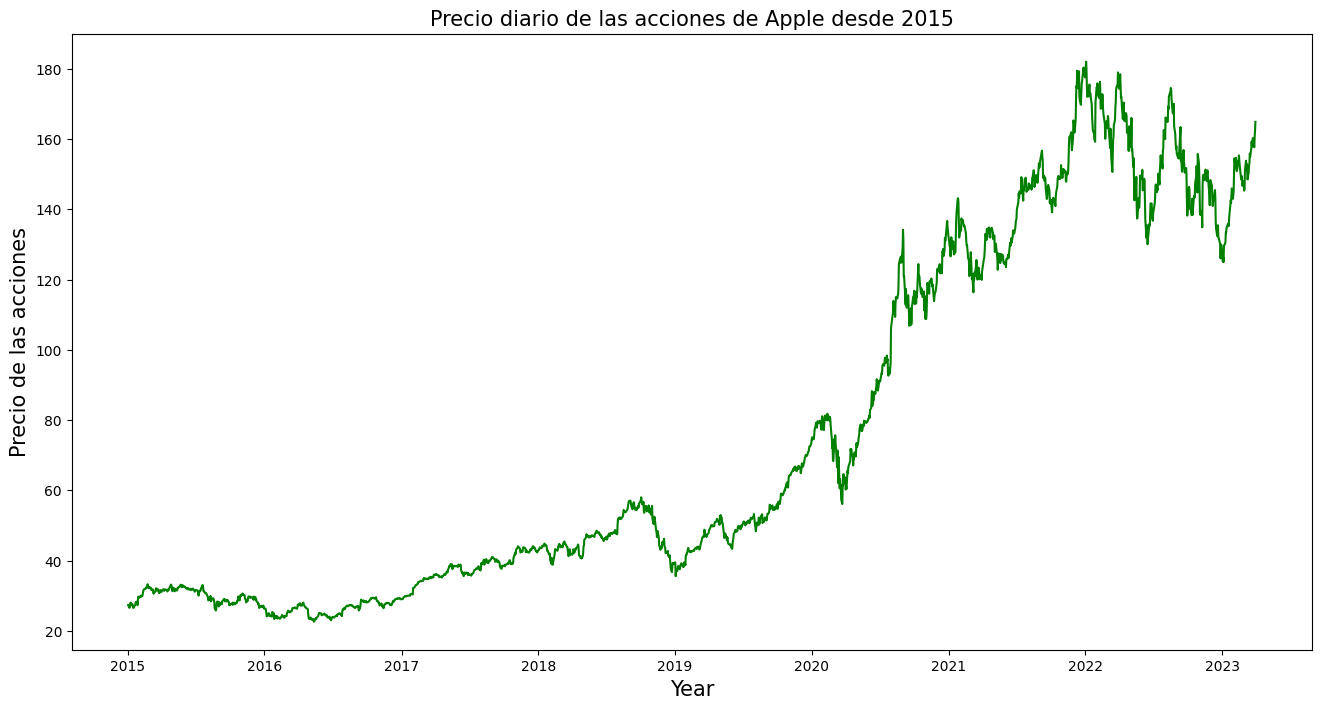

In [68]:
x_data=apple['Date']
y_data=apple['Close']
plt.figure(figsize=(16,8))
plt.plot(x_data,y_data,'g')
plt.xlabel('Year',size=15)
plt.ylabel('Precio de las acciones',size=15)
plt.title('Precio diario de las acciones de Apple desde 2015',size=15)
plt.show()

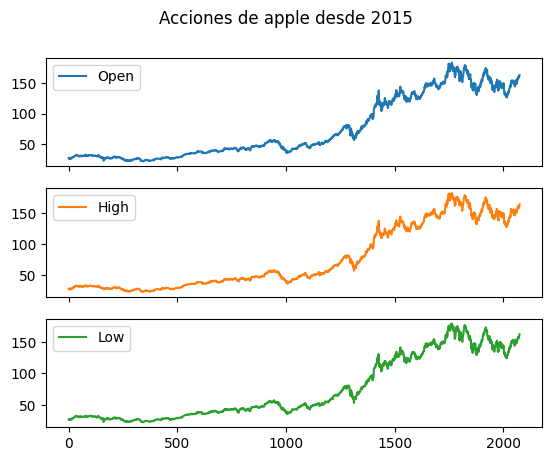

In [69]:
grafica=pd.DataFrame(apple,columns=['Open','High','Low'])
grafica.plot(title='Acciones de apple desde 2015',subplots=True)
plt.show()

In [9]:
df=pd.DataFrame(apple,columns=['Date','Open','High','Low','Volume','Adj Close','Close'])
df['Date']=LabelEncoder().fit_transform(df['Date'])
df.sample(5)

,Date,Open,High,Low,Volume,Adj Close,Close
1402,1402,93.750000,95.230003,93.712502,90329200,93.439522,95.040001
197,197,27.822500,27.879999,27.389999,177849600,25.078009,27.552500
1975,1975,142.089996,142.669998,134.380005,140814800,138.169037,138.380005
13,13,27.565001,28.117500,27.430000,215185600,25.255505,28.100000
1798,1798,165.539993,166.149994,159.750000,90009200,159.106186,160.070007


## Modelo: Linear Regression

In [10]:
X=df[['Date','Open','High','Low','Volume','Adj Close']]
Y=df['Close']
print('X shape:',X.shape)
print('Y shape:',Y.shape)

X shape: (2076, 6)
Y shape: (2076,)


In [11]:
X_train,X_test,Y_train,Y_test=model_selection.train_test_split(X,Y,random_state=1,test_size=0.2)
print('X_train dimension= ', X_train.shape)
print('X_test dimension= ', X_test.shape)
print('y_train dimension= ', Y_train.shape)
print('y_test dimension= ', Y_test.shape)

X_train dimension=  (1660, 6)
X_test dimension=  (416, 6)
y_train dimension=  (1660,)
y_test dimension=  (416,)


In [12]:
linreg=linear_model.LinearRegression()
linreg.fit(X_train,Y_train)

LinearRegression()

In [13]:
linreg.score(X_test,Y_test)

0.9999721480233519

In [14]:
pred_linreg=linreg.predict(X_test)
pred_linreg

array([ 42.11117778,  24.30782702,  32.42137267,  50.97785571,
        56.21658004,  38.1638409 ,  43.52293647,  50.90138641,
        92.62294705,  79.37554121,  79.34726983,  26.56938457,
       148.49211058, 134.14609052,  24.64879505,  32.21383164,
        24.05242551,  55.05464148,  52.18147695, 117.89458335,
        40.5439853 ,  73.26058768, 129.605777  ,  34.83543345,
        28.05358457,  26.42312391,  24.03524923,  39.15304649,
        31.69838129,  83.99375351,  28.32137175, 165.6154739 ,
        50.3951483 ,  37.47859504,  31.75147714,  49.1516621 ,
        45.22023213,  29.95946109,  30.75474741,  39.46349241,
        44.41486341,  48.07522328,  80.3470415 ,  59.91129254,
       136.80076373,  35.09582766, 178.97024022,  27.4760148 ,
        47.76435715,  26.52357144,  28.9992114 ,  40.11791279,
       136.67674322,  34.88397549,  38.3325667 , 145.84494997,
       144.31176167,  38.73739905, 112.00567714,  34.63539249,
        42.45481591,  58.70514285,  28.4604067 ,  27.78

In [15]:
columns=['Date','Open','High','Low','Volume','Adj Close']
print(linreg.intercept_)
print(list(zip(columns,linreg.coef_)))

2.2941071649143083
[('Date', -0.0012273740052998346), ('Open', -0.09079528247403204), ('High', 0.10658161092085021), ('Low', 0.13667137766683593), ('Volume', 3.1253183374602145e-10), ('Adj Close', 0.8530564745241281)]


In [16]:
#Mean Absolute Error
mae=metrics.mean_absolute_error(Y_test,pred_linreg)
mae

0.21485814614085674

In [17]:
#Mean Squared Error
mse=metrics.mean_squared_error(Y_test,pred_linreg,squared=True)
mse

0.06915673822478033

In [18]:
rmse=metrics.mean_squared_error(Y_test,pred_linreg,squared=False)
rmse

0.2629766876070583

In [20]:
predicciones=pd.DataFrame(Y_test)
predicciones['prediccion']=pred_linreg
predicciones['Date']=X_test['Date']
grafica=predicciones.sort_values(by='Date',ascending=True)

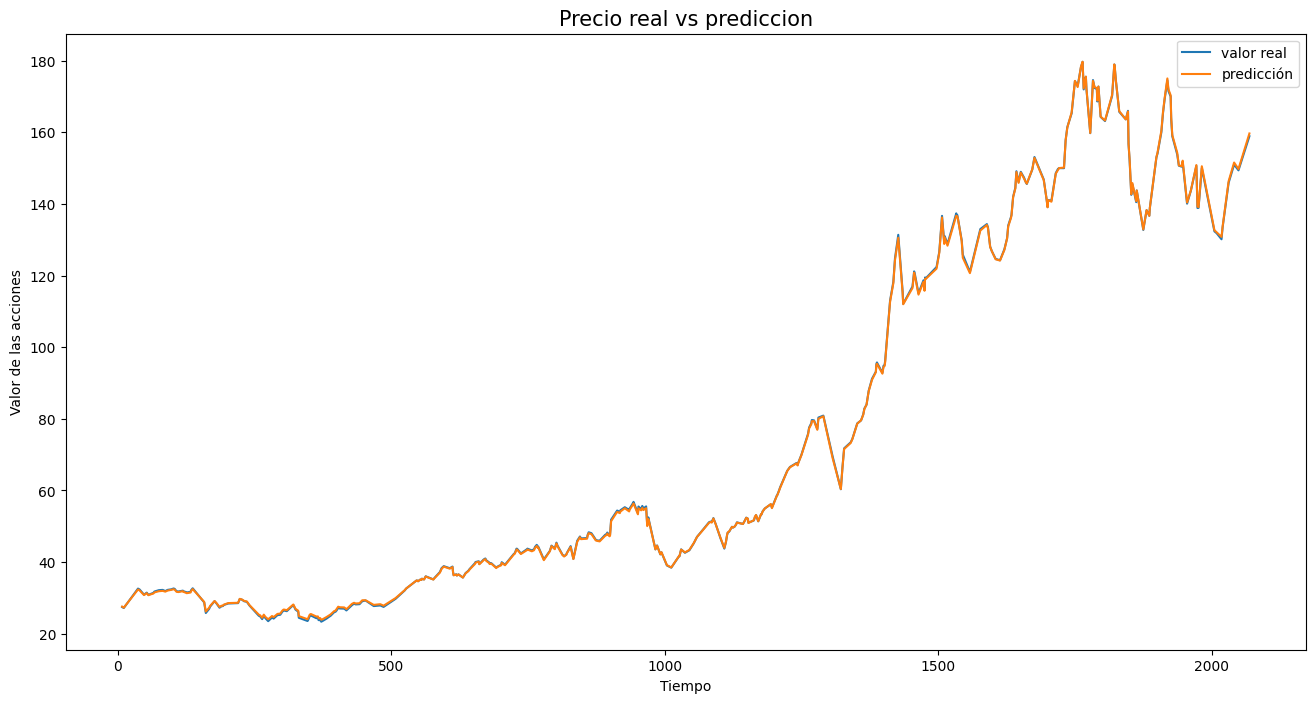

In [21]:
X_data=grafica['Date']
Y_data=grafica['Close']
Y_data1=grafica['prediccion']
plt.figure(figsize=(16,8))
plt.plot(X_data,Y_data,label='valor real')
plt.plot(X_data,Y_data1,label='predicción') 
plt.xlabel('Tiempo',size=10)
plt.ylabel('Valor de las acciones',size=10)
plt.title('Precio real vs prediccion',size=15)
plt.legend(loc='best')
plt.show()

## Predicciones de los dias 3, 4, 5 y 6 de abril 

In [22]:
abril_3=[819,164.270004,166.289993,164.220001,56976200,166.169998]
abril_4=[820,166.600006,166.839996,165.110001,46278300,165.630005]
abril_5=[821,164.740005,165.050003,161.800003,51511700,163.759995]
abril_6=[822,162.429993,164.960007,162.000000,45390100,164.660004]

In [23]:
pred_3abril=linreg.predict([abril_3])
pred_4abril=linreg.predict([abril_4])
pred_5abril=linreg.predict([abril_5])
pred_6abril=linreg.predict([abril_6])
print('prediccion 3 abril:',pred_3abril)
print('prediccion 4 abril:',pred_4abril)
print('prediccion 5 abril:',pred_5abril)
print('prediccion 6 abril:',pred_6abril)

prediccion 3 abril: [168.31177509]
prediccion 4 abril: [167.8152643]
prediccion 5 abril: [165.74616539]
prediccion 6 abril: [166.73826346]


C:\Users\Usuario\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\Usuario\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\Usuario\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\Usuario\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [24]:
true=[166.169998,165.630005,163.759995,164.660004]
pred=[pred_3abril,pred_4abril,pred_5abril,pred_6abril]

In [25]:
mae=metrics.mean_absolute_error(true,pred)
mae

2.0978665597412416

In [26]:
mse=metrics.mean_squared_error(true,pred,squared=True)
mse

4.406650627444979

In [27]:
rmse=metrics.mean_squared_error(true,pred,squared=False)
rmse

2.0992023788679783

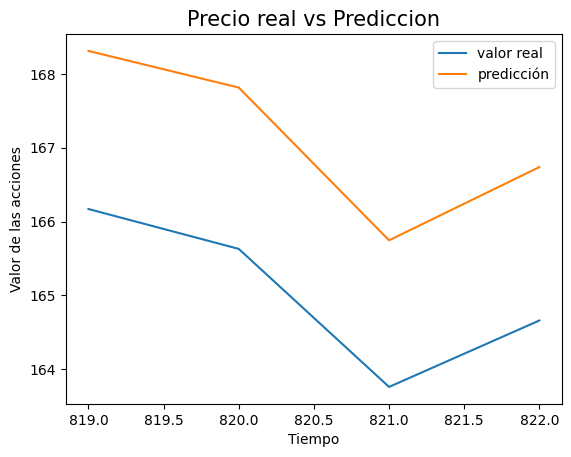

In [28]:
X_data=[abril_3[0],abril_4[0],abril_5[0],abril_6[0]]
Y_data=true
Y_data1=pred
plt.plot(X_data,Y_data,label='valor real')
plt.plot(X_data,Y_data1,label='predicción') 
plt.xlabel('Tiempo',size=10)
plt.ylabel('Valor de las acciones',size=10)
plt.title('Precio real vs Prediccion',size=15)
plt.legend(loc='best')
plt.show()

# Redes Recurrentes, LSTM

In [29]:
rnn=pd.DataFrame(df,columns=['Close'],index=df['Date'])

In [66]:
def split_sequence(sequence, steps):
    x, y = list(), list()
    for i in range(len(sequence)):

        end_ix = i + steps
    
        if end_ix > len(sequence)-1:
            break
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        x.append(seq_x)
        y.append(seq_y)
    return asarray(x), asarray(y)

In [32]:
values=rnn.values.astype('float32')
steps=6

x,y=split_sequence(values,steps)

x=x.reshape((x.shape[0],x.shape[1],1))
n_test=100
            
x_train, x_test, y_train, y_test = x[:-n_test], x[-n_test:], y[:-n_test], y[-n_test:]
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(1970, 6, 1) (100, 6, 1) (1970, 1) (100, 1)


## LSTM 100 capas, loss=mse

In [34]:
model = Sequential()
model.add(LSTM(100, activation='relu', kernel_initializer='he_normal', input_shape=(steps,1)))
model.add(Dense(50, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(1))
# compilar
model.compile(optimizer='adam', loss='mse')
# entrenamiento
model.fit(x_train, y_train, epochs=150, batch_size=32, verbose=1, validation_data=(x_test, y_test))
model.save('res/model1')

Epoch 1/150
62/62 [==============================] - 3s 15ms/step - loss: 79.9012 - val_loss: 16.6345
Epoch 2/150
62/62 [==============================] - 1s 8ms/step - loss: 7.9885 - val_loss: 17.5477
Epoch 3/150
62/62 [==============================] - 1s 8ms/step - loss: 6.1079 - val_loss: 37.4147
Epoch 4/150
62/62 [==============================] - 1s 9ms/step - loss: 10.4047 - val_loss: 76.0501
Epoch 5/150
62/62 [==============================] - 1s 9ms/step - loss: 9.7238 - val_loss: 13.8532
Epoch 6/150
62/62 [==============================] - 1s 8ms/step - loss: 10.5535 - val_loss: 56.0996
Epoch 7/150
62/62 [==============================] - 1s 9ms/step - loss: 7.3407 - val_loss: 20.9647
Epoch 8/150
62/62 [==============================] - 1s 10ms/step - loss: 6.4839 - val_loss: 14.9081
Epoch 9/150
62/62 [==============================] - 1s 9ms/step - loss: 14.0264 - val_loss: 36.6598
Epoch 10/150
62/62 [==============================] - 1s 8ms/step - loss: 8.0310 - val_loss: 2

In [35]:
model1 = load_model('res/model1')
error = model.evaluate(x_test, y_test, verbose=0)
print(f'MSE: {error:.3f}, RMSE: {sqrt(error):.3f}')

MSE: 8.982, RMSE: 2.997


In [36]:
lstm_pred = model1.predict(x_test)
set_printoptions(precision=3)
print(f'Predicted: {lstm_pred}')

4/4 [==============================] - 0s 4ms/step
Predicted: [[139.207]
 [139.303]
 [140.561]
 [137.095]
 [146.805]
 [150.192]
 [149.775]
 [151.064]
 [150.457]
 [152.224]
 [152.771]
 [150.293]
 [151.718]
 [152.211]
 [150.358]
 [146.673]
 [142.98 ]
 [148.01 ]
 [149.208]
 [149.55 ]
 [148.451]
 [145.152]
 [142.72 ]
 [143.464]
 [143.364]
 [145.844]
 [146.919]
 [145.208]
 [139.205]
 [136.231]
 [133.26 ]
 [133.247]
 [136.04 ]
 [134.066]
 [133.537]
 [131.546]
 [127.979]
 [130.295]
 [130.701]
 [127.474]
 [127.824]
 [126.075]
 [130.35 ]
 [131.324]
 [132.039]
 [134.569]
 [134.915]
 [136.064]
 [137.36 ]
 [136.895]
 [136.889]
 [139.01 ]
 [142.153]
 [143.932]
 [143.417]
 [145.158]
 [147.259]
 [145.121]
 [145.77 ]
 [146.609]
 [151.701]
 [155.751]
 [153.572]
 [155.644]
 [153.886]
 [152.824]
 [152.441]
 [154.884]
 [154.906]
 [156.806]
 [155.708]
 [154.503]
 [150.684]
 [150.364]
 [150.375]
 [148.619]
 [149.464]
 [148.804]
 [147.318]
 [147.447]
 [151.624]
 [155.008]
 [153.515]
 [154.188]
 [152.521]
 [1

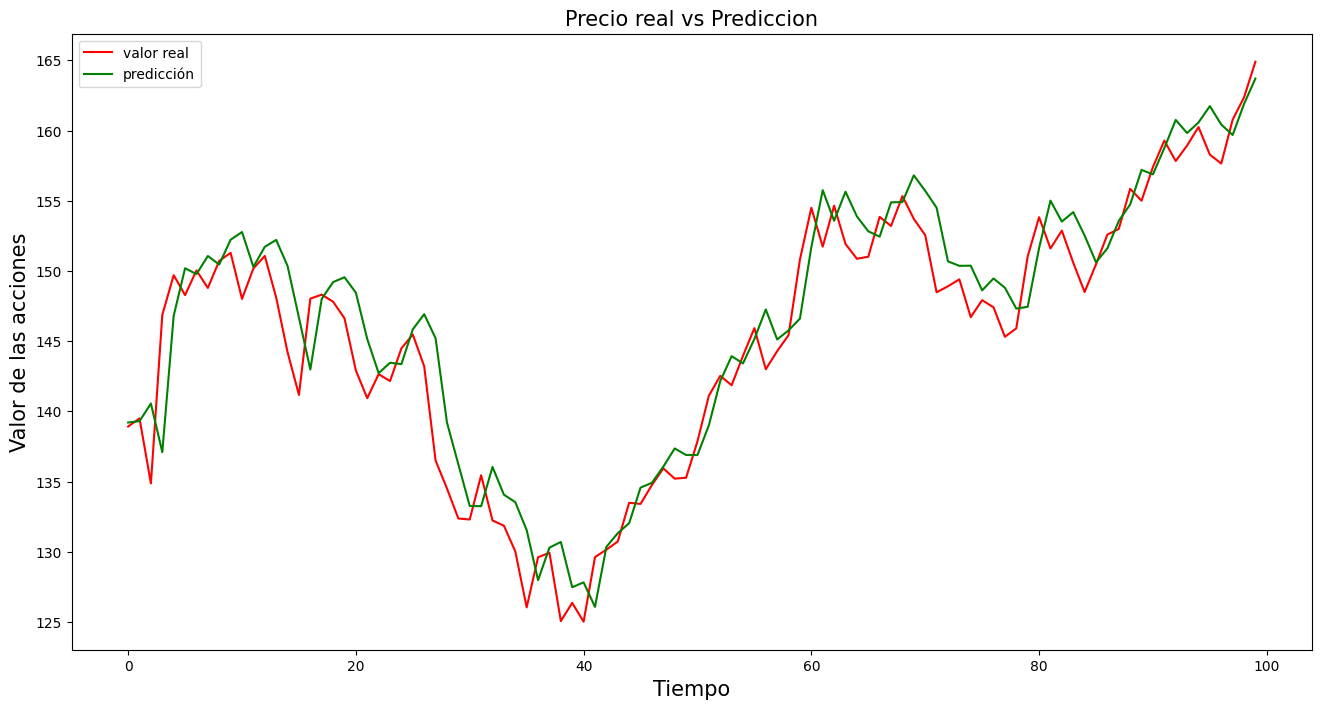

In [39]:
X_data=range(len(x_test))
Y_data=y_test
Y_data1=lstm_pred
plt.figure(figsize=(16,8))
plt.plot(X_data,Y_data,'r',label='valor real')
plt.plot(X_data,Y_data1,'g',label='predicción') 
plt.xlabel('Tiempo',size=15)
plt.ylabel('Valor de las acciones',size=15)
plt.title('Precio real vs Prediccion',size=15)
plt.legend(loc='best')
plt.show()

## LSTM 100 capas, loss=mae

In [41]:
model = Sequential()
model.add(LSTM(100, activation='relu', kernel_initializer='he_normal', input_shape=(steps,1)))
model.add(Dense(50, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(1))
# compilar
model.compile(optimizer='adam', loss='mae')
# entrenamiento
model.fit(x_train, y_train, epochs=150, batch_size=32, verbose=1, validation_data=(x_test, y_test))
model.save('res/model2')

Epoch 1/150
62/62 [==============================] - 3s 14ms/step - loss: 18.8263 - val_loss: 14.1886
Epoch 2/150
62/62 [==============================] - 1s 10ms/step - loss: 3.5815 - val_loss: 9.4963
Epoch 3/150
62/62 [==============================] - 1s 9ms/step - loss: 3.1785 - val_loss: 5.8087
Epoch 4/150
62/62 [==============================] - 1s 8ms/step - loss: 3.2887 - val_loss: 5.7473
Epoch 5/150
62/62 [==============================] - 1s 8ms/step - loss: 2.9870 - val_loss: 4.5406
Epoch 6/150
62/62 [==============================] - 1s 10ms/step - loss: 2.2129 - val_loss: 7.1103
Epoch 7/150
62/62 [==============================] - 0s 8ms/step - loss: 2.3043 - val_loss: 3.0853
Epoch 8/150
62/62 [==============================] - 1s 9ms/step - loss: 2.4139 - val_loss: 11.5984
Epoch 9/150
62/62 [==============================] - 1s 8ms/step - loss: 2.7641 - val_loss: 3.4022
Epoch 10/150
62/62 [==============================] - 1s 9ms/step - loss: 2.2819 - val_loss: 9.4159
Epo

In [52]:
model2 = load_model('res/model2')
error = model2.evaluate(x_test, y_test, verbose=0)
print(f'MAE: {error:.3f}')

MAE: 2.580


In [44]:
model2 = load_model('res/model2')
lstm_mae_pred = model2.predict(x_test)
set_printoptions(precision=3)
print(f'Predicted: {lstm_mae_pred}')

4/4 [==============================] - 0s 4ms/step
Predicted: [[137.934]
 [138.14 ]
 [137.698]
 [132.859]
 [145.404]
 [147.252]
 [146.355]
 [147.265]
 [147.796]
 [149.437]
 [149.305]
 [146.46 ]
 [148.48 ]
 [149.427]
 [146.611]
 [142.357]
 [140.161]
 [146.826]
 [145.902]
 [145.863]
 [144.239]
 [141.759]
 [139.732]
 [141.136]
 [140.422]
 [142.55 ]
 [143.456]
 [141.585]
 [134.79 ]
 [133.766]
 [131.86 ]
 [131.618]
 [133.374]
 [130.433]
 [130.329]
 [128.497]
 [125.487]
 [128.177]
 [128.244]
 [123.868]
 [124.677]
 [123.918]
 [128.503]
 [127.864]
 [129.275]
 [131.522]
 [132.057]
 [133.158]
 [134.193]
 [133.79 ]
 [133.644]
 [136.425]
 [139.539]
 [140.587]
 [139.86 ]
 [142.331]
 [144.361]
 [141.326]
 [142.516]
 [143.886]
 [149.357]
 [152.043]
 [149.576]
 [152.686]
 [150.274]
 [149.772]
 [149.057]
 [152.461]
 [151.008]
 [153.469]
 [151.636]
 [151.062]
 [146.771]
 [147.766]
 [147.465]
 [145.086]
 [145.972]
 [145.705]
 [143.884]
 [144.099]
 [149.387]
 [151.779]
 [149.254]
 [150.879]
 [149.07 ]
 [1

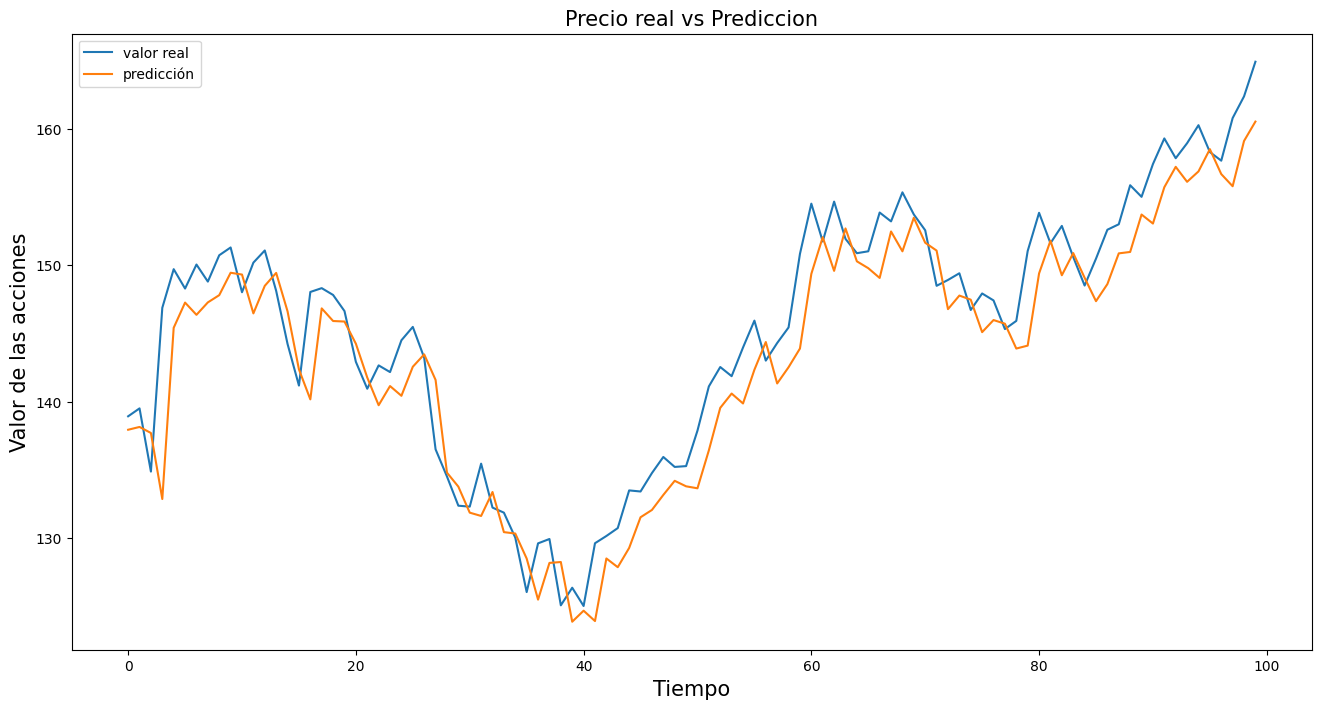

In [45]:
X_data=range(len(x_test))
Y_data=y_test
Y_data1=lstm_mae_pred
plt.figure(figsize=(16,8))
plt.plot(X_data,Y_data,label='valor real')
plt.plot(X_data,Y_data1,label='predicción') 
plt.xlabel('Tiempo',size=15)
plt.ylabel('Valor de las acciones',size=15)
plt.title('Precio real vs Prediccion',size=15)
plt.legend(loc='best')
plt.show()

##  LSTM 100 capas, loss=mse, metrics=mae

In [47]:
model = Sequential()
model.add(LSTM(100, activation='relu', kernel_initializer='he_normal', input_shape=(steps,1)))
model.add(Dense(50, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(1))
# compilar
model.compile(optimizer='adam', loss='mse',metrics=['mae'])
# entrenamiento
model.fit(x_train, y_train, epochs=150, batch_size=32, verbose=1, validation_data=(x_test, y_test))
model.save('res/model3')

Epoch 1/150
62/62 [==============================] - 3s 14ms/step - loss: 1587.9996 - mae: 17.6868 - val_loss: 16.0428 - val_mae: 3.2481
Epoch 2/150
62/62 [==============================] - 1s 9ms/step - loss: 6.3994 - mae: 1.5889 - val_loss: 12.3069 - val_mae: 2.8774
Epoch 3/150
62/62 [==============================] - 1s 8ms/step - loss: 5.1699 - mae: 1.4286 - val_loss: 12.9138 - val_mae: 2.9787
Epoch 4/150
62/62 [==============================] - 0s 8ms/step - loss: 4.8585 - mae: 1.3860 - val_loss: 11.1052 - val_mae: 2.7126
Epoch 5/150
62/62 [==============================] - 0s 8ms/step - loss: 4.7686 - mae: 1.3679 - val_loss: 13.2123 - val_mae: 3.0149
Epoch 6/150
62/62 [==============================] - 1s 8ms/step - loss: 4.6565 - mae: 1.3386 - val_loss: 11.1564 - val_mae: 2.7149
Epoch 7/150
62/62 [==============================] - 1s 8ms/step - loss: 4.6208 - mae: 1.3478 - val_loss: 11.6583 - val_mae: 2.7153
Epoch 8/150
62/62 [==============================] - 1s 8ms/step - loss

In [49]:
model3 = load_model('res/model3')
MSE,MAE = model.evaluate(x_test, y_test, verbose=0)
print(f'MSE: {MSE:.3f}, RMSE: {sqrt(MSE):.3f}, MAE:{MAE:.3f}')

MSE: 13.505, RMSE: 3.675, MAE:2.948


In [53]:
es_mse_pred = model3.predict(x_test)
set_printoptions(precision=3)
print(f'Predicted: {es_mse_pred}')

4/4 [==============================] - 0s 7ms/step
Predicted: [[142.722]
 [142.468]
 [142.557]
 [138.726]
 [147.329]
 [150.595]
 [150.233]
 [151.928]
 [151.156]
 [153.102]
 [153.842]
 [151.378]
 [152.854]
 [153.616]
 [151.496]
 [148.251]
 [145.255]
 [150.073]
 [150.74 ]
 [150.43 ]
 [149.494]
 [146.447]
 [144.735]
 [145.641]
 [145.186]
 [146.858]
 [147.719]
 [146.11 ]
 [140.846]
 [138.525]
 [136.369]
 [135.77 ]
 [137.857]
 [135.319]
 [134.724]
 [133.124]
 [129.753]
 [132.083]
 [132.325]
 [128.58 ]
 [129.064]
 [127.832]
 [131.306]
 [132.135]
 [132.636]
 [135.045]
 [135.338]
 [136.723]
 [137.898]
 [137.585]
 [137.765]
 [139.809]
 [142.654]
 [144.264]
 [144.103]
 [145.874]
 [147.797]
 [145.967]
 [146.863]
 [147.814]
 [152.199]
 [155.765]
 [154.199]
 [156.586]
 [154.896]
 [154.115]
 [154.186]
 [156.197]
 [156.049]
 [157.643]
 [156.633]
 [155.689]
 [152.505]
 [152.303]
 [152.561]
 [150.325]
 [150.912]
 [150.373]
 [148.682]
 [148.92 ]
 [152.749]
 [155.47 ]
 [154.249]
 [155.215]
 [153.669]
 [1

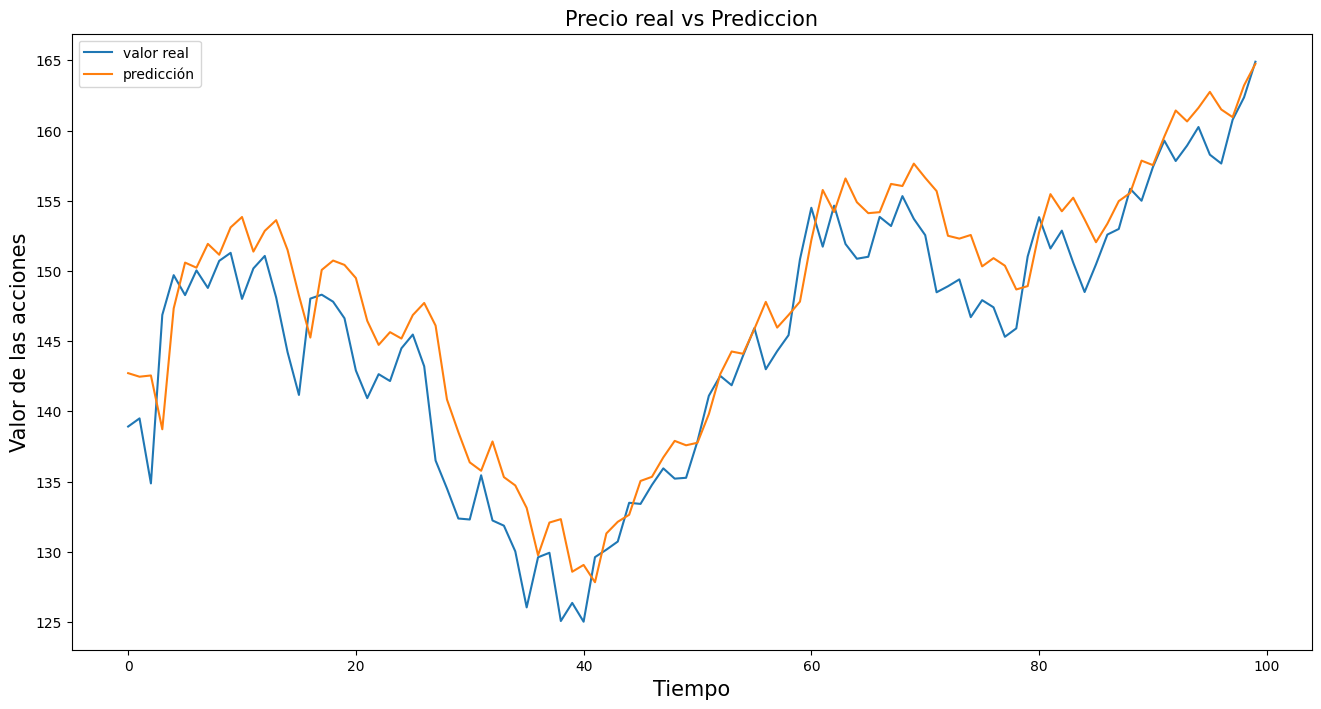

In [54]:
X_data=range(len(x_test))
Y_data=y_test
Y_data1=es_mse_pred
plt.figure(figsize=(16,8))
plt.plot(X_data,Y_data,label='valor real')
plt.plot(X_data,Y_data1,label='predicción') 
plt.xlabel('Tiempo',size=15)
plt.ylabel('Valor de las acciones',size=15)
plt.title('Precio real vs Prediccion',size=15)
plt.legend(loc='best')
plt.show()

## Comparación de modelos

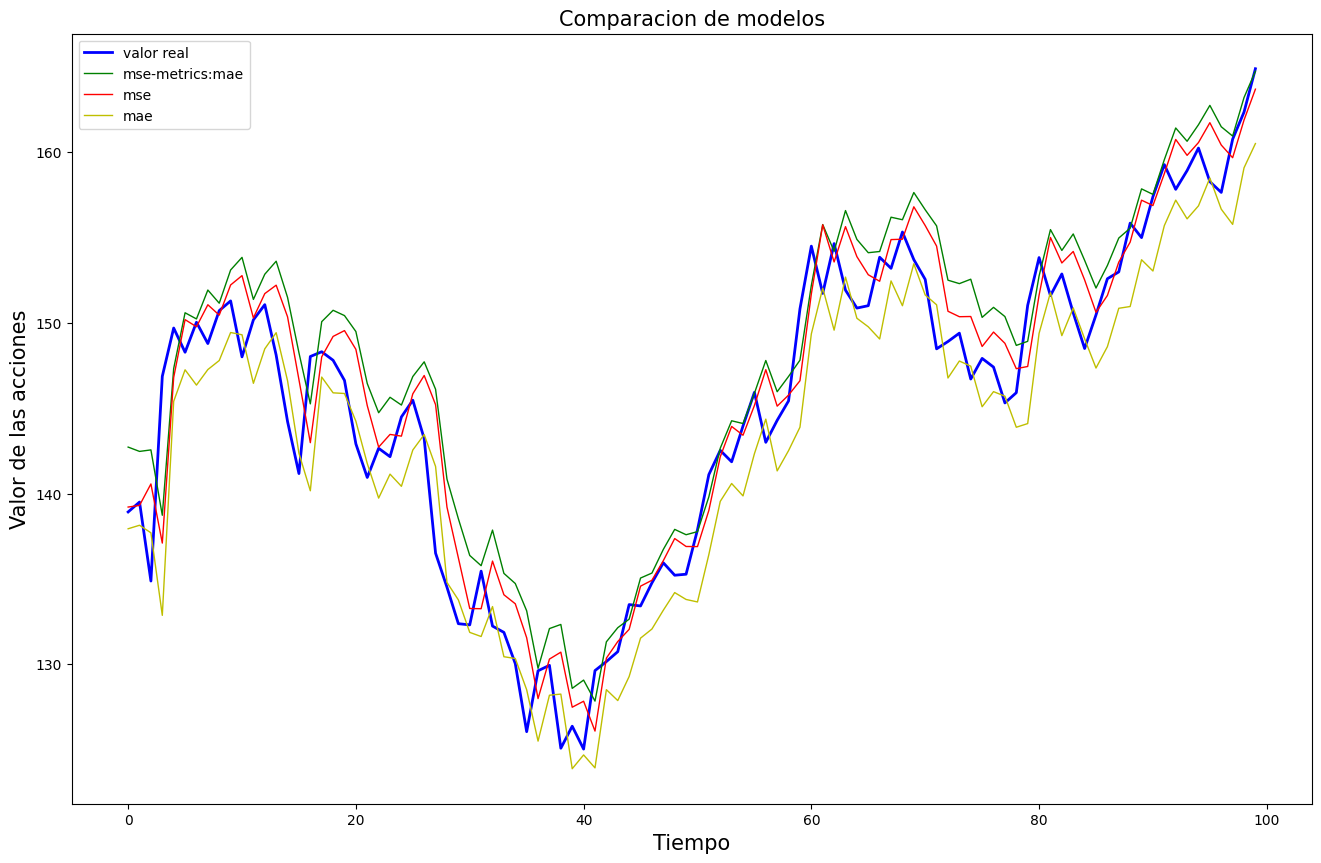

In [67]:
x_data=range(len(x_test))
y_data=y_test
y_data1=es_mse_pred
y_data2=lstm_pred
y_data3=lstm_mae_pred
plt.figure(figsize=(16,10))
plt.plot(x_data,y_data,'b',label='valor real',linewidth=2)
plt.plot(x_data,y_data1,'g',label='mse-metrics:mae',linewidth=1) 
plt.plot(x_data,y_data2,'r',label='mse',linewidth=1)
plt.plot(x_data,y_data3,'y',label='mae',linewidth=1)
plt.xlabel('Tiempo',size=15)
plt.ylabel('Valor de las acciones',size=15)
plt.title('Comparacion de modelos',size=15)
plt.legend(loc='best')
plt.show()

## Para predecir el día 6 abril escogemos el modelo 1 que una vez entrenado y validado es el que mas se acerca a el resultado real

In [62]:
model1 = load_model('res/model1')
row=asarray([160.77,162.36,164.90,166.17,165.63,163.76]).reshape((1,steps,1))
pred_abril6 = model1.predict(row)

set_printoptions(precision=3)
print(f'Valor de las acciones de Apple el dia 6 de abril: {pred_abril6}')

1/1 [==============================] - 0s 337ms/step
Valor de las acciones de Apple el dia 6 de abril: [[165.874]]
